# Mall Customer Segmentation Analysis

This notebook demonstrates a complete Machine Learning pipeline for segmenting mall customers based on their demographic and spending patterns. We utilize techniques like **One-Hot Encoding**, **Feature Standardization**, and **Clustering** to uncover hidden patterns in the data.

## 1. Environment Setup & Data Acquisition

### Importing Libraries
In this stage, we import the necessary libraries for data manipulation (**pandas**, **numpy**), visualization (**seaborn**, **matplotlib**), and machine learning (**scikit-learn**). Using specialized libraries ensures efficiency and access to state-of-the-art algorithms.

In [18]:
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical computing
import seaborn as sns # Statistical data visualization
import matplotlib.pyplot as plt # Plotting and visualization
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Scaling and Categorical encoding
from sklearn.cluster import KMeans, DBSCAN # Clustering algorithms
from sklearn.decomposition import PCA # Dimensionality reduction

### Loading the Dataset
We load the `Mall_Customers.csv` dataset. The initial step involves dropping identifiers (like CustomerID) that do not provide predictive value for clustering, ensuring the model focuses on behavioral and demographic patterns.

In [19]:
df = pd.read_csv('Mall_Customers.csv')  # Load raw dataset
df = df.iloc[:, 1:]  # Drop 'CustomerID' column (irrelevant for clustering)

## 2. Data Pre-processing & Feature Engineering

### Encoding and Scaling
Machine learning models require numerical input. Here we apply:
1. **One-Hot Encoding**: To convert categorical 'Gender' into a numerical format without implying ordinality.
2. **Standardization**: We use the Z-score formula $z = \frac{x - \mu}{\sigma}$ to scale features. This is critical because distances (used in K-Means/DBSCAN) are sensitive to feature magnitude. Standardization prevents features with larger ranges (like Income) from dominating those with smaller ranges (like Age).

In [20]:
Ohe = OneHotEncoder(drop='if_binary', sparse_output=False) # Binary encoding for gender
std_scaler = StandardScaler() # Scale to mean=0 and unit variance

ohe_gender = Ohe.fit_transform(df[['Gender']])
standardized_data = std_scaler.fit_transform(df.select_dtypes(include=['number']))

new_data = np.concat([ohe_gender, standardized_data], axis=1) # Combine processed features
new_df = pd.DataFrame(new_data, index=df.index, columns=df.columns)
new_df = new_df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'})

## 3. Exploratory Data Analysis (EDA)

### Correlation Heatmap
Analyzing feature correlations helps us understand relationships between variables. High multicollinearity can sometimes skew distance-based models, though here we use it primarily for insight.

<Figure size 3000x3000 with 0 Axes>

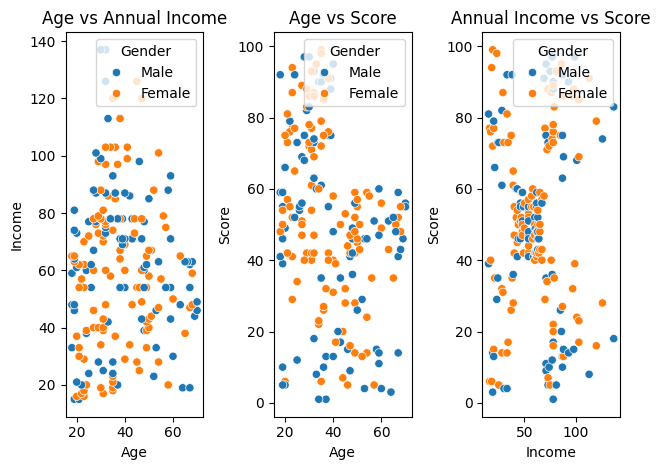

In [21]:
# print(new_df)
temp_df = df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'})
plt.figure(figsize=(30, 30))
fig, axes = plt.subplots(1, 3)

sns.scatterplot(data=temp_df, ax=axes[0], x='Age', y='Income', hue='Gender')
axes[0].set_title('Age vs Annual Income')

sns.scatterplot(data=temp_df, ax=axes[1], x='Age', y='Score', hue='Gender')
axes[1].set_title('Age vs Score')

sns.scatterplot(data=temp_df, ax=axes[2], x='Income', y='Score', hue='Gender')
axes[2].set_title('Annual Income vs Score')

plt.tight_layout()
plt.show()

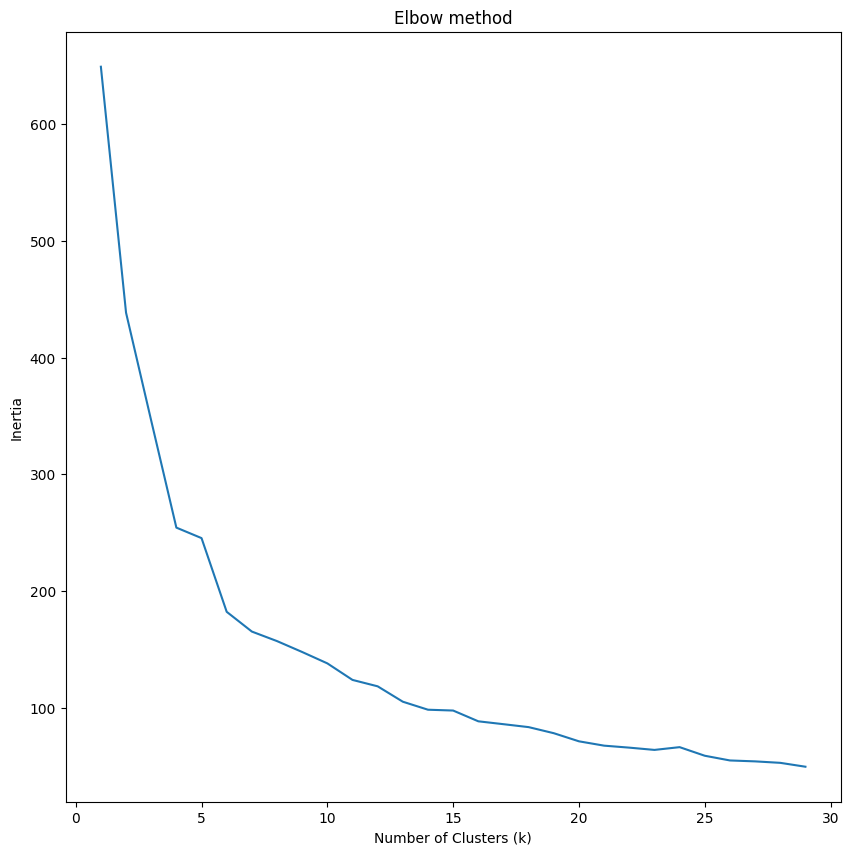

In [22]:
n = 30
inertia = []

for i in range(1, n):
    model = KMeans(n_clusters=i, n_init='auto')
    model.fit(new_data)
    inertia.append(model.inertia_)
X = np.arange(1, n)
Y = inertia

plt.figure(figsize=(10, 10))
plt.plot(X, Y)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

In [23]:
pca_model = PCA(n_components=2)
pca_data = pca_model.fit_transform(new_data)

pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df = pd.concat([pca_df, df['Gender']], axis=1)

In [24]:
optimal_model = KMeans(n_clusters=10)
labels = optimal_model.fit_predict(new_data)

pca_df['Cluster'] = labels
# print(pca_df)
pca_df['Gender'] = df['Gender']

<Axes: xlabel='PCA1', ylabel='PCA2'>

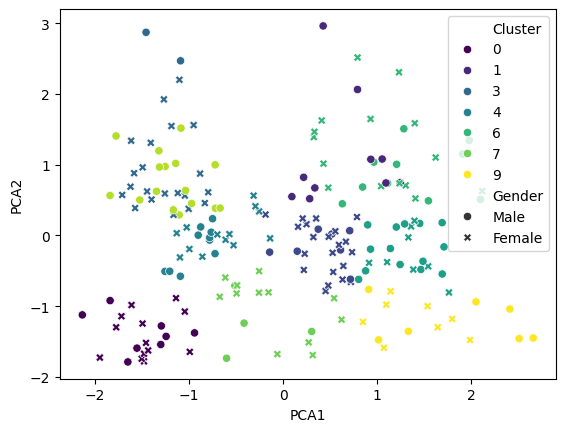

In [25]:
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', style='Gender', palette='viridis')

## 4. Business Results & Interpretation

### Summary for Stakeholders
Based on the clustering analysis above, we have identified key customer segments. This allows for:
- **Targeted Marketing**: Focusing high-spending campaigns on the 'High Income, High Spending' group.
- **Retention Strategies**: Engaging 'High Income, Low Spending' customers with curated offers.
- **Efficiency**: Avoiding over-marketing to segments with traditionally low ROI.